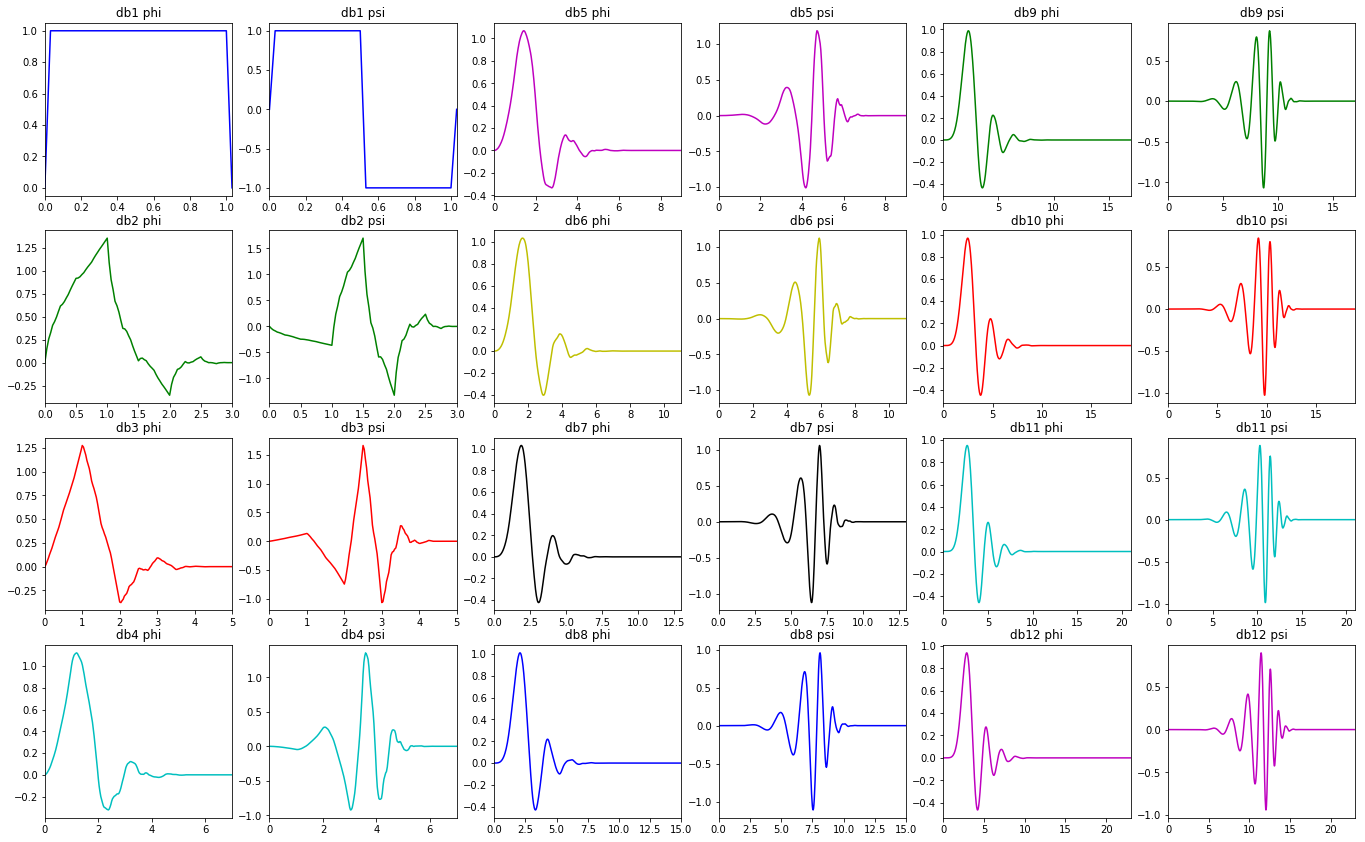

In [2]:
''' 
Exercício 1 
Lista 4
Professora: Chang
Aluno: Renan de Luca Avila
'''

#!/usr/bin/env python
# -*- coding: utf-8 -*-
%matplotlib inline
# Plot scaling and wavelet functions for db, sym, coif, bior and rbio families

import itertools

import matplotlib.pyplot as plt

import pywt


# plot_data = [('db', (4, 3)),
#              ('sym', (4, 3)),
#              ('coif', (3, 2))]

plot_data = [('db', (4, 3))]



for family, (rows, cols) in plot_data:
    fig = plt.figure(figsize=(20, 12))
    fig.subplots_adjust(hspace=0.2, wspace=0.2, bottom=.02, left=.06,
                        right=.97, top=.94)
    colors = itertools.cycle('bgrcmyk')

    wnames = pywt.wavelist(family)
    i = iter(wnames)
    for col in range(cols):
        for row in range(rows):
            try:
                wavelet = pywt.Wavelet(next(i))
            except StopIteration:
                break
            phi, psi, x = wavelet.wavefun(level=5)

            color = next(colors)
            ax = fig.add_subplot(rows, 2 * cols, 1 + 2 * (col + row * cols))
            ax.set_title(wavelet.name + " phi")
            ax.plot(x, phi, color)
            ax.set_xlim(min(x), max(x))

            ax = fig.add_subplot(rows, 2*cols, 1 + 2*(col + row*cols) + 1)
            ax.set_title(wavelet.name + " psi")
            ax.plot(x, psi, color)
            ax.set_xlim(min(x), max(x))

# for family, (rows, cols) in [('bior', (4, 3)), ('rbio', (4, 3))]:
#     fig = plt.figure(figsize=(20, 12))
#     fig.subplots_adjust(hspace=0.5, wspace=0.2, bottom=.02, left=.06,
#                         right=.97, top=.94)

#     colors = itertools.cycle('bgrcmyk')
#     wnames = pywt.wavelist(family)
#     i = iter(wnames)
#     for col in range(cols):
#         for row in range(rows):
#             try:
#                 wavelet = pywt.Wavelet(next(i))
#             except StopIteration:
#                 break
#             phi, psi, phi_r, psi_r, x = wavelet.wavefun(level=5)
#             row *= 2

#             color = next(colors)
#             ax = fig.add_subplot(2*rows, 2*cols, 1 + 2*(col + row*cols))
#             ax.set_title(wavelet.name + " phi")
#             ax.plot(x, phi, color)
#             ax.set_xlim(min(x), max(x))

#             ax = fig.add_subplot(2*rows, 2*cols, 2*(1 + col + row*cols))
#             ax.set_title(wavelet.name + " psi")
#             ax.plot(x, psi, color)
#             ax.set_xlim(min(x), max(x))

#             row += 1
#             ax = fig.add_subplot(2*rows, 2*cols, 1 + 2*(col + row*cols))
#             ax.set_title(wavelet.name + " phi_r")
#             ax.plot(x, phi_r, color)
#             ax.set_xlim(min(x), max(x))

#             ax = fig.add_subplot(2*rows, 2*cols, 1 + 2*(col + row*cols) + 1)
#             ax.set_title(wavelet.name + " psi_r")
#             ax.plot(x, psi_r, color)
#             ax.set_xlim(min(x), max(x))

plt.show()

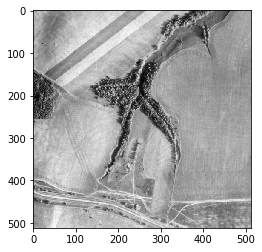

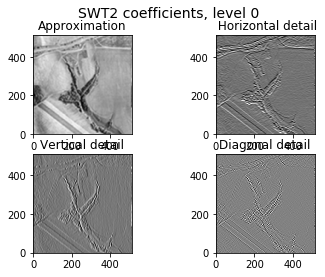

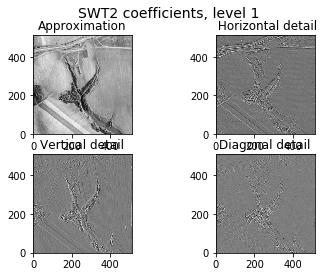

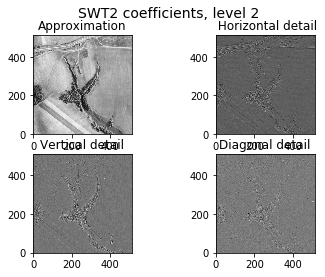

In [3]:
  
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt

import pywt
import pywt.data


arr = pywt.data.aero()

plt.imshow(arr, interpolation="nearest", cmap=plt.cm.gray)

level = 0
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
for LL, (LH, HL, HH) in pywt.swt2(arr, 'bior1.3', level=3, start_level=0):
    fig = plt.figure()
    for i, a in enumerate([LL, LH, HL, HH]):
        ax = fig.add_subplot(2, 2, i + 1)
        ax.imshow(a, origin='image', interpolation="nearest", cmap=plt.cm.gray)
        ax.set_title(titles[i], fontsize=12)

    fig.suptitle("SWT2 coefficients, level %s" % level, fontsize=14)
    level += 1


plt.show()